<a href="https://colab.research.google.com/github/JDLiu/DigitalImageProcessAtNCHU/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#掛載Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 環境初始化

In [ ]:
#載入框架
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
import numpy as np
import os

In [ ]:
#切換預設目錄
SYS_DIR = "/content/drive/My Drive/Colab Notebooks/DIP"
if not os.path.isdir(SYS_DIR):
    os.mkdir(SYS_DIR)
os.chdir(SYS_DIR)

In [ ]:
#標準化
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [ ]:
# 拉普拉斯運算子
mask_lap = np.array(
    [
        # 遮罩
        [-1, -2, -1,0,  0,  0,1,  2,  1]
    ]
)

#輸入值處理,避免像素爆掉,因為灰階只能介於0~255
def convVal(pV):
    if pV > 255:
        pV = 255
    elif pV < 0:
        pV = 0
    return pV

# 拉普拉斯運算子
def LaplacianOperatorMask(src, out, m):
    width, height = out.shape[:2]
    #對圖依序做相乘累加,最後判斷做限縮
    for i in range(1, width - 1):
        for j in range(1, height - 1):
            lapla =  mask_lap[m][0] * src[i - 1, j - 1] + mask_lap[m][1] * src[i - 1, j] +\
             mask_lap[m][2] * src[i - 1, j + 1] + mask_lap[m][3] * src[i, j - 1] + \
             mask_lap[m][4] * src[i, j] +  mask_lap[m][5] * src[i, j + 1] + mask_lap[m][6] * src[i + 1, j - 1] +\
             mask_lap[m][7] * src[i + 1, j] + mask_lap[m][8] * src[i + 1, j + 1] 
            out[i, j] = convVal(lapla)
    return out

In [ ]:
# 索伯運算子 遮罩,0是做dy,1是做dx
mask_sob = np.array(
    [
        # 遮罩 dy
        [ -1, -2, -1, 0,  0,  0, 1,  2,  1] ,
        # 遮罩 dx
        [ -1, 0, 1,-2, 0, 2,-1, 0, 1 ]
    ]
)
# 索伯運算子
def SobelOperatorMask(src, out, m):
    width, height = out.shape[:2]
    for i in range(1, width - 1):
        for j in range(1, height - 1):
          #對圖依序做相乘累加,最後判斷做限縮
            sob = mask_sob[m][0] * src[i - 1, j - 1] + mask_sob[m][1] * src[i - 1, j] + mask_sob[m][2] * src[i - 1, j + 1] + \
                   mask_sob[m][3] * src[i, j - 1] + mask_sob[m][4] * src[i, j] + mask_sob[m][5] * src[i, j + 1] + \
                   mask_sob[m][6] * src[i + 1, j - 1] + mask_sob[m][7] * src[i + 1, j] + mask_sob[m][8] * src[i + 1, j + 1]
            out[i, j] = convVal(sob)
    return out

In [ ]:
# 降噪 Side Window Filtering
mask_sw = np.array(
    [
        [ 0, 0, 0, 0, 1, 0, 0, 0, 0 ]
    ]
)

def SWFilter(src, out, m):
    width, height = out.shape[:2]
    for i in range(1, width - 1):
        for j in range(1, height - 1):
          #對圖依序做相乘累加,最後判斷做限縮
            swf = mask_sw[m][0] * src[i - 1, j - 1] + \
                    mask_sw[m][1] * src[i - 1, j] + \
                    mask_sw[m][2] * src[i - 1, j + 1] + \
                    mask_sw[m][3] * src[i, j - 1] + \
                    mask_sw[m][4] * src[i, j] + \
                    mask_sw[m][5] * src[i, j + 1] + \
                    mask_sw[m][6] * src[i + 1, j - 1] + \
                    mask_sw[m][7] * src[i + 1, j] + \
                    mask_sw[m][8] * src[i + 1, j + 1]
            out[i, j] = convVal(swf)
    return out

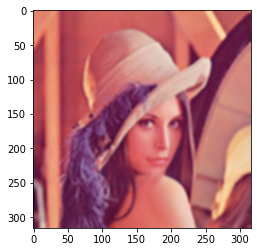

In [ ]:
#為了找到好一點的測試對象,只好把清晰原圖先轉模糊
image_clr = plt.imread('Lenna.jpg')
kernel = np.ones([5, 5], np.float32)/25
dst = cv2.filter2D(image_clr, -1, kernel=kernel)
plt.imsave('Lenna_blur.jpg', dst)
plt.imshow(dst)

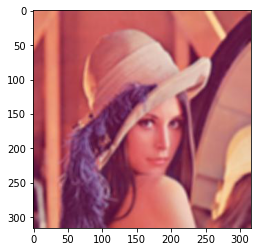

In [ ]:
#原始影像,程式會轉換成包含RGB的矩陣
image_org = plt.imread('Lenna_blur.jpg')
plt.imshow(image_org)

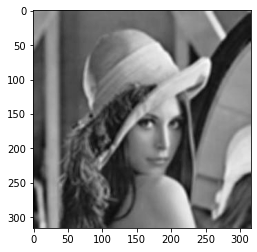

In [ ]:
#轉灰階影像,變成灰階矩陣
image_gray = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap='gray')
plt.imsave('Lenna_gray.jpg', image_gray,cmap='gray')

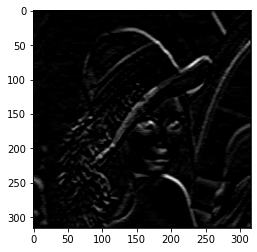

In [ ]:
#對灰階影像做Laplacian Mask
#image_glap = cv2.Laplacian(image_gray,cv2.CV_64F)
#image_glap = np.uint8(np.absolute(image_glap))
# 將圖片與Sobel Operator dy 做 Mask
image_laplace = np.zeros((w, h), dtype=image_gray.dtype)
image_glap=LaplacianOperatorMask(np.array(image_gray), image_laplace, 0)
plt.imshow(image_glap,cmap='gray')

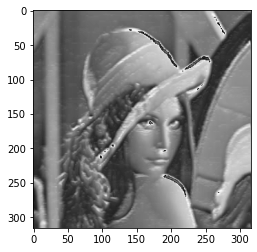

In [ ]:
#將Laplace後的結果和原始影像相加,得到銳化後的圖,但是雜訊也被放大了
image_com1=image_glap+image_gray
plt.imshow(image_com1,cmap='gray')
plt.imsave('image_com1.jpg', image_com1,cmap='gray')

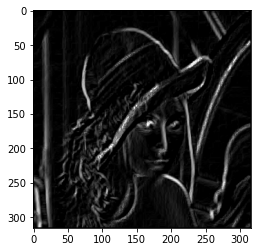

In [ ]:
#image_sx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0)
#image_sy = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1)
#image_sx = np.uint8(np.absolute(image_sx))
#image_sy = np.uint8(np.absolute(image_sy))

# 將圖片與Sobel Operator 做 Mask dy
img_sobel_dy = np.zeros((w, h), dtype=image_gray.dtype)
image_sy=SobelMask(np.array(image_gray), img_sobel_dy, 0)
# 將圖片與Sobel Operator 做 Mask dx
img_sobel_dx = np.zeros((w, h), dtype=image_gray.dtype)
image_sx=SobelMask(np.array(image_gray), img_sobel_dx, 1)

# 合併 Sobel Operator Mask後的結果
image_scom = cv2.bitwise_or(image_sx, image_sy)
plt.imshow(image_scom,cmap='gray')

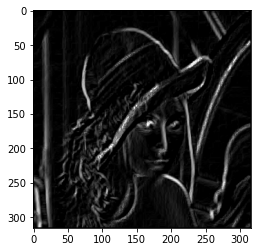

In [ ]:
#進行降噪
img_swf=image_scom
for i in range(len(mask2)):
    img_swf_tmp = np.zeros((w, h), dtype=image_gray.dtype)
    # 將圖片與Side Window Filtering 做 Mask
    img_swf = SWFilter(img_swf, img_swf_tmp, i)
plt.imshow(img_swf,cmap='gray')

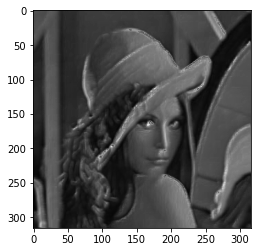

In [ ]:
#進行標準化後,先乘第一個結果後得到邊緣的落差,再和灰階相加
image_scom_n=normalization(img_swf)*image_com1
image_final=image_scom_n+image_gray
plt.imshow(image_final,cmap='gray')
plt.imsave('unsharp_masking_result.jpg', image_final,cmap='gray')